# Step #1: Import Datasets

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/3yrs_Bike_data.csv')
bike_df

,New_time_format_BIXI,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
0,2017-04-15 00,0,6,0,11.4,-5.4,30,27,8,101.76,144,4,2017
1,2017-04-15 01,0,6,1,10.8,-6.2,30,27,9,101.70,76,4,2017
2,2017-04-15 02,0,6,2,10.9,-6.3,29,27,11,101.65,39,4,2017
3,2017-04-15 03,0,6,3,10.2,-6.0,31,27,9,101.61,40,4,2017
4,2017-04-15 04,0,6,4,8.4,-4.3,40,20,4,101.58,12,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14949,2019-10-31 19,1,4,19,12.3,11.9,97,1,12,98.66,166,10,2019
14950,2019-10-31 20,1,4,20,10.3,9.8,97,1,13,98.60,133,10,2019
14951,2019-10-31 21,1,4,21,9.2,8.7,97,3,15,98.60,119,10,2019
14952,2019-10-31 22,1,4,22,8.5,7.9,96,2,11,98.47,121,10,2019


In [5]:
bike_df.describe()

,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
count,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000
mean,0.714391,3.990772,11.503879,16.067875,8.966464,65.646783,18.775512,6.182493,100.626652,1022.998729,7.343253,2017.964892
std,0.451719,2.002919,6.926563,7.405918,7.383633,18.602370,10.299778,2.907672,0.724800,893.835045,2.032786,0.804030
min,0.000000,1.000000,0.000000,-10.700000,-19.300000,14.000000,0.000000,1.000000,96.820000,3.000000,4.000000,2017.000000
25%,0.000000,2.000000,5.000000,10.900000,4.200000,52.000000,13.000000,4.000000,100.160000,262.000000,6.000000,2017.000000
50%,1.000000,4.000000,12.000000,16.800000,9.600000,66.000000,20.000000,6.000000,100.600000,833.500000,7.000000,2018.000000
75%,1.000000,6.000000,18.000000,21.700000,14.600000,81.000000,26.000000,8.000000,101.080000,1527.000000,9.000000,2019.000000
max,1.000000,7.000000,23.000000,35.800000,24.300000,100.000000,36.000000,25.000000,102.830000,4921.000000,11.000000,2019.000000


In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14954 entries, 0 to 14953
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   New_time_format_BIXI  14954 non-null  object 
 1   Working_day           14954 non-null  int64  
 2   week_day              14954 non-null  int64  
 3   Hours                 14954 non-null  int64  
 4   temp_celcius          14954 non-null  float64
 5   dew_pt_celcius        14954 non-null  float64
 6   rel_humidity          14954 non-null  int64  
 7   wind_dir              14954 non-null  int64  
 8   wind_speed            14954 non-null  int64  
 9   stn_press             14954 non-null  float64
 10  Count                 14954 non-null  int64  
 11  month                 14954 non-null  int64  
 12  Years                 14954 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.5+ MB


# Step #2: Clean up dataset

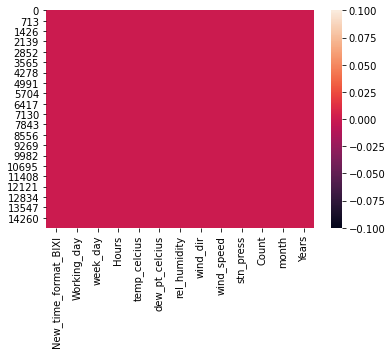

In [7]:
sns.heatmap(bike_df.isnull())

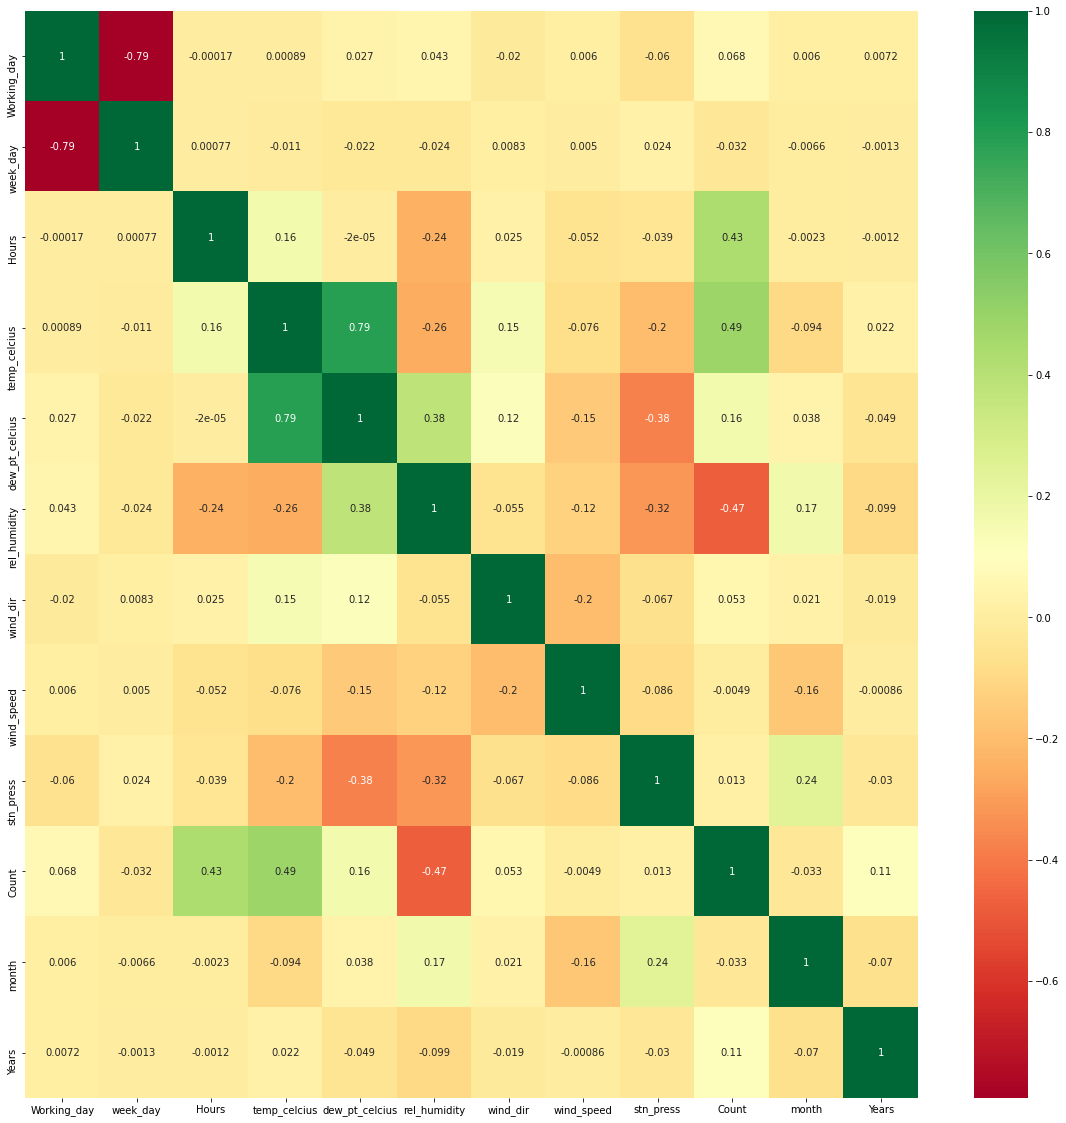

In [8]:
corrmat=bike_df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(bike_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#sns.heatmap(flight.corr(), annot = True)

In [9]:
#bike_df.describe(include='all').loc['unique', :]

In [10]:
#bike_df.stn_press.nunique()

In [11]:
bike_df = bike_df.rename(columns={'New_time_format_BIXI': 'start_date'})

In [12]:
bike_df.start_date = pd.to_datetime(bike_df.start_date) #format='%I,%m/%d/%Y')
bike_df.index = pd.DatetimeIndex(bike_df.start_date)

In [13]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14954 entries, 2017-04-15 00:00:00 to 2019-10-31 23:00:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   start_date      14954 non-null  datetime64[ns]
 1   Working_day     14954 non-null  int64         
 2   week_day        14954 non-null  int64         
 3   Hours           14954 non-null  int64         
 4   temp_celcius    14954 non-null  float64       
 5   dew_pt_celcius  14954 non-null  float64       
 6   rel_humidity    14954 non-null  int64         
 7   wind_dir        14954 non-null  int64         
 8   wind_speed      14954 non-null  int64         
 9   stn_press       14954 non-null  float64       
 10  Count           14954 non-null  int64         
 11  month           14954 non-null  int64         
 12  Years           14954 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 1.6 MB


In [14]:
bike_df

,start_date,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
start_date,,,,,,,,,,,,,
2017-04-15 00:00:00,2017-04-15 00:00:00,0,6,0,11.4,-5.4,30,27,8,101.76,144,4,2017
2017-04-15 01:00:00,2017-04-15 01:00:00,0,6,1,10.8,-6.2,30,27,9,101.70,76,4,2017
2017-04-15 02:00:00,2017-04-15 02:00:00,0,6,2,10.9,-6.3,29,27,11,101.65,39,4,2017
2017-04-15 03:00:00,2017-04-15 03:00:00,0,6,3,10.2,-6.0,31,27,9,101.61,40,4,2017
2017-04-15 04:00:00,2017-04-15 04:00:00,0,6,4,8.4,-4.3,40,20,4,101.58,12,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 19:00:00,2019-10-31 19:00:00,1,4,19,12.3,11.9,97,1,12,98.66,166,10,2019
2019-10-31 20:00:00,2019-10-31 20:00:00,1,4,20,10.3,9.8,97,1,13,98.60,133,10,2019
2019-10-31 21:00:00,2019-10-31 21:00:00,1,4,21,9.2,8.7,97,3,15,98.60,119,10,2019


In [15]:
bike_df = bike_df.drop(labels = ['start_date'], axis=1)

# Step #3: Visualize Dataset

Text(0, 0.5, 'Bike Rental')

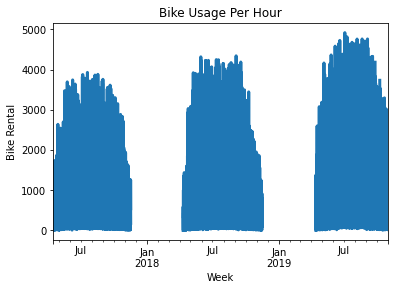

In [16]:
bike_df['Count'].asfreq('H').plot(linewidth= 3)
plt.title('Bike Usage Per Hour')
plt.xlabel('Week')
plt.ylabel('Bike Rental')

Text(0, 0.5, 'Bike Rental')

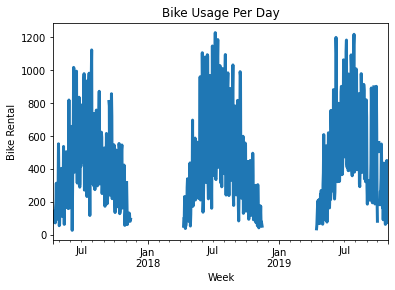

In [17]:
bike_df['Count'].asfreq('D').plot(linewidth= 3)
plt.title('Bike Usage Per Day')
plt.xlabel('Week')
plt.ylabel('Bike Rental')

Text(0, 0.5, 'Bike Rental')

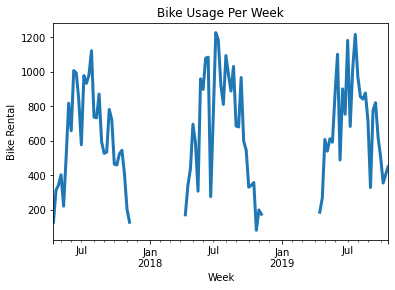

In [18]:
bike_df['Count'].asfreq('W').plot(linewidth= 3)
plt.title('Bike Usage Per Week')
plt.xlabel('Week')
plt.ylabel('Bike Rental')

In [19]:
#group data into hourly records using mean and modes

#start_date        291692
#Working_day          NaN
#week_day             NaN
#Hours                NaN
#temp_celcius         NaN
#dew_pt_celcius       NaN
#rel_humidity         NaN
#wind_dir             NaN
#wind_speed           NaN
#stn_press            NaN
#Count                NaN
#month                NaN
#is_member   

 
def grp(x):
    d = {}
    d['Working_day'] = x['Working_day'].agg(lambda x:x.value_counts().index[0])
    d['week_day'] = x['week_day'].agg(lambda x:x.value_counts().index[0])
    d['Hours'] = x['Hours'].agg(lambda x:x.value_counts().index[0])
    d['temp_celcius'] = x['temp_celcius'].mean()
    d['dew_pt_celcius'] = x['dew_pt_celcius'].mean()
    d['rel_humidity'] = x['rel_humidity'].mean()
    d['wind_dir'] = x['wind_dir'].agg(lambda x:x.value_counts().index[0])
    d['wind_speed'] = x['wind_speed'].agg(lambda x:x.value_counts().index[0])
    d['stn_press'] = x['stn_press'].agg(lambda x:x.value_counts().index[0])
    d['Count'] = x['Count'].sum()
    d['month'] = x['month'].agg(lambda x:x.value_counts().index[0])
    d['is_member'] = x['is_member'].agg(lambda x:x.value_counts().index[0])
    return pd.Series(d, index=['Working_day', 'week_day','Hours',  'temp_celcius',
    'dew_pt_celcius','rel_humidity', 'wind_dir', 'wind_speed', 'month', 'is_member', 'stn_press','Count'])



In [20]:
bike_df.head()

,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
start_date,,,,,,,,,,,,
2017-04-15 00:00:00,0,6,0,11.4,-5.4,30,27,8,101.76,144,4,2017
2017-04-15 01:00:00,0,6,1,10.8,-6.2,30,27,9,101.70,76,4,2017
2017-04-15 02:00:00,0,6,2,10.9,-6.3,29,27,11,101.65,39,4,2017
2017-04-15 03:00:00,0,6,3,10.2,-6.0,31,27,9,101.61,40,4,2017
2017-04-15 04:00:00,0,6,4,8.4,-4.3,40,20,4,101.58,12,4,2017


In [21]:
#bike_df.reset_index(inplace=True)

In [22]:
#bike_df['start_date'] = bike_df['start_date'].dt.floor('h')

In [23]:
#bike_new = bike_df.groupby(['start_date']).apply(grp)

In [24]:
bike_new = bike_df

In [25]:
bike_new.tail()

,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
start_date,,,,,,,,,,,,
2019-10-31 19:00:00,1,4,19,12.3,11.9,97,1,12,98.66,166,10,2019
2019-10-31 20:00:00,1,4,20,10.3,9.8,97,1,13,98.60,133,10,2019
2019-10-31 21:00:00,1,4,21,9.2,8.7,97,3,15,98.60,119,10,2019
2019-10-31 22:00:00,1,4,22,8.5,7.9,96,2,11,98.47,121,10,2019
2019-10-31 23:00:00,1,4,23,8.2,7.7,97,1,5,98.35,80,10,2019


In [26]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14954 entries, 2017-04-15 00:00:00 to 2019-10-31 23:00:00
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Working_day     14954 non-null  int64  
 1   week_day        14954 non-null  int64  
 2   Hours           14954 non-null  int64  
 3   temp_celcius    14954 non-null  float64
 4   dew_pt_celcius  14954 non-null  float64
 5   rel_humidity    14954 non-null  int64  
 6   wind_dir        14954 non-null  int64  
 7   wind_speed      14954 non-null  int64  
 8   stn_press       14954 non-null  float64
 9   Count           14954 non-null  int64  
 10  month           14954 non-null  int64  
 11  Years           14954 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.1 MB


In [27]:
bike_new.describe()

,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
count,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000
mean,0.714391,3.990772,11.503879,16.067875,8.966464,65.646783,18.775512,6.182493,100.626652,1022.998729,7.343253,2017.964892
std,0.451719,2.002919,6.926563,7.405918,7.383633,18.602370,10.299778,2.907672,0.724800,893.835045,2.032786,0.804030
min,0.000000,1.000000,0.000000,-10.700000,-19.300000,14.000000,0.000000,1.000000,96.820000,3.000000,4.000000,2017.000000
25%,0.000000,2.000000,5.000000,10.900000,4.200000,52.000000,13.000000,4.000000,100.160000,262.000000,6.000000,2017.000000
50%,1.000000,4.000000,12.000000,16.800000,9.600000,66.000000,20.000000,6.000000,100.600000,833.500000,7.000000,2018.000000
75%,1.000000,6.000000,18.000000,21.700000,14.600000,81.000000,26.000000,8.000000,101.080000,1527.000000,9.000000,2019.000000
max,1.000000,7.000000,23.000000,35.800000,24.300000,100.000000,36.000000,25.000000,102.830000,4921.000000,11.000000,2019.000000


In [28]:
#Use Time Series on the Count 
time_step = bike_new.index
count = bike_new.values[:, -3]

series = pd.Series(data = count, index=time_step)
series = series[~series.index.duplicated(keep='first')]
time = np.array(time_step)


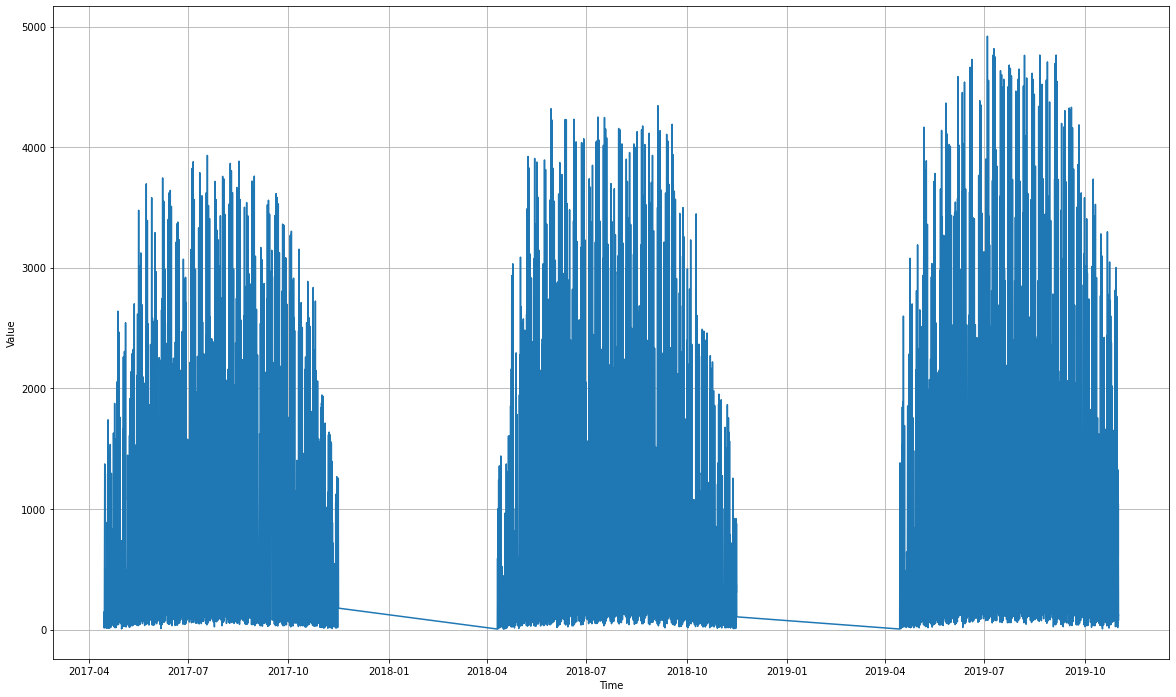

In [29]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(20, 12))
plot_series(time, series)
plt.savefig('Time_Series_Hourly.png')

In [30]:
#plt.savefig('Time_Series_Hourly.png')

In [31]:
#sns.pairplot(bike_new)

In [32]:
bike_new['Hours'] = bike_new['Hours'].astype(pd.np.int64)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


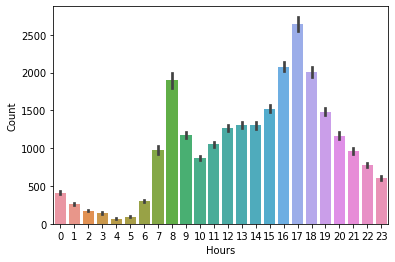

In [33]:
#Bike usage throughout the day

sns.barplot(x="Hours", y="Count", data=bike_new)

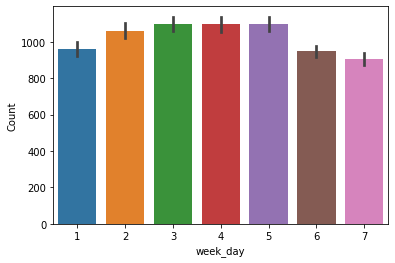

In [34]:
#Bike usage throughout the week
sns.barplot(x="week_day", y="Count", data=bike_new)

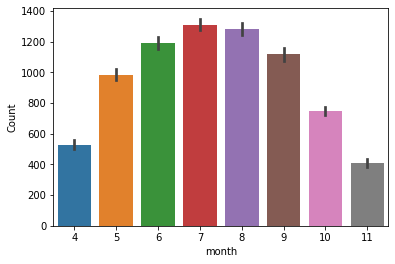

In [35]:
#Bike usage throughout the week
sns.barplot(x="month", y="Count", data=bike_new)

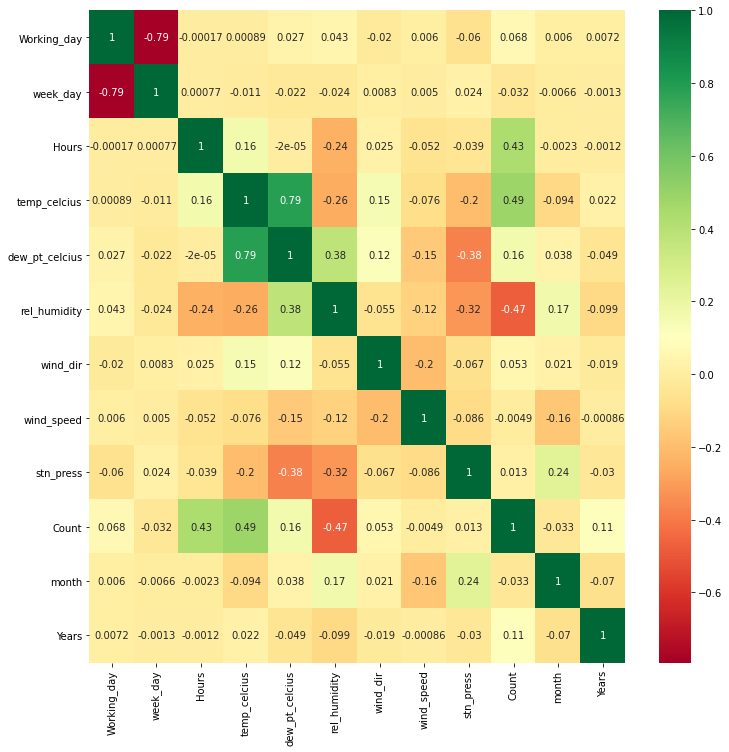

In [36]:
#See correlation Matrix

corrmat=bike_new.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(12,12)) 
#plot heat map 
g=sns.heatmap(bike_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#sns.heatmap(flight.corr(), annot = True)

In [37]:
bike_new.head()

,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
start_date,,,,,,,,,,,,
2017-04-15 00:00:00,0,6,0,11.4,-5.4,30,27,8,101.76,144,4,2017
2017-04-15 01:00:00,0,6,1,10.8,-6.2,30,27,9,101.70,76,4,2017
2017-04-15 02:00:00,0,6,2,10.9,-6.3,29,27,11,101.65,39,4,2017
2017-04-15 03:00:00,0,6,3,10.2,-6.0,31,27,9,101.61,40,4,2017
2017-04-15 04:00:00,0,6,4,8.4,-4.3,40,20,4,101.58,12,4,2017


In [38]:
#feature Engineering

X = bike_new.drop(['Count'], axis=1)
X.shape

(14954, 11)

In [39]:
y=bike_new['Count']

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
#import matplotlib.pyplot as plt
model_h = ExtraTreesRegressor()
model_h.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [41]:
print(model_h.feature_importances_)

[0.06077791 0.01839833 0.56697347 0.14024744 0.02302689 0.11970466
 0.00816075 0.00792354 0.01056322 0.02487602 0.01934777]


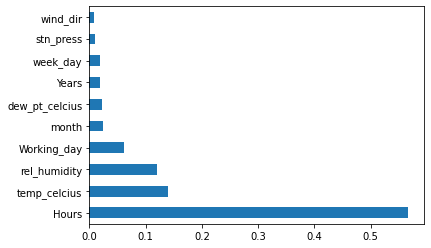

In [42]:
#Features with most importance ('Hours' column is the most important feature in relation to the 'Count')

feat_importance = pd.Series(model_h.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

# Step #4: Random Forest Model

In [43]:
bike_new

,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
start_date,,,,,,,,,,,,
2017-04-15 00:00:00,0,6,0,11.4,-5.4,30,27,8,101.76,144,4,2017
2017-04-15 01:00:00,0,6,1,10.8,-6.2,30,27,9,101.70,76,4,2017
2017-04-15 02:00:00,0,6,2,10.9,-6.3,29,27,11,101.65,39,4,2017
2017-04-15 03:00:00,0,6,3,10.2,-6.0,31,27,9,101.61,40,4,2017
2017-04-15 04:00:00,0,6,4,8.4,-4.3,40,20,4,101.58,12,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 19:00:00,1,4,19,12.3,11.9,97,1,12,98.66,166,10,2019
2019-10-31 20:00:00,1,4,20,10.3,9.8,97,1,13,98.60,133,10,2019
2019-10-31 21:00:00,1,4,21,9.2,8.7,97,3,15,98.60,119,10,2019


In [44]:
bike_rf = bike_new.reset_index()

bike_rf = bike_rf.drop(['start_date'], axis = 1)

In [45]:
bike_rf

,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
0,0,6,0,11.4,-5.4,30,27,8,101.76,144,4,2017
1,0,6,1,10.8,-6.2,30,27,9,101.70,76,4,2017
2,0,6,2,10.9,-6.3,29,27,11,101.65,39,4,2017
3,0,6,3,10.2,-6.0,31,27,9,101.61,40,4,2017
4,0,6,4,8.4,-4.3,40,20,4,101.58,12,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
14949,1,4,19,12.3,11.9,97,1,12,98.66,166,10,2019
14950,1,4,20,10.3,9.8,97,1,13,98.60,133,10,2019
14951,1,4,21,9.2,8.7,97,3,15,98.60,119,10,2019
14952,1,4,22,8.5,7.9,96,2,11,98.47,121,10,2019


In [46]:
#reorder columns

column_titles = ['Working_day', 'week_day',	'Hours',	'temp_celcius',	'dew_pt_celcius',	'rel_humidity',	'wind_dir',	'wind_speed',	'stn_press', 'month',	'Years', 'Count']

bike_rf = bike_rf.reindex(columns=column_titles)

In [47]:
X_rf = bike_rf.iloc[:, :-1]
Y_rf = bike_rf.iloc[:, -1]

In [48]:
X_rf

,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,month,Years
0,0,6,0,11.4,-5.4,30,27,8,101.76,4,2017
1,0,6,1,10.8,-6.2,30,27,9,101.70,4,2017
2,0,6,2,10.9,-6.3,29,27,11,101.65,4,2017
3,0,6,3,10.2,-6.0,31,27,9,101.61,4,2017
4,0,6,4,8.4,-4.3,40,20,4,101.58,4,2017
...,...,...,...,...,...,...,...,...,...,...,...
14949,1,4,19,12.3,11.9,97,1,12,98.66,10,2019
14950,1,4,20,10.3,9.8,97,1,13,98.60,10,2019
14951,1,4,21,9.2,8.7,97,3,15,98.60,10,2019
14952,1,4,22,8.5,7.9,96,2,11,98.47,10,2019


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_rf, Y_rf, test_size = 0.2)

In [50]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11963, 11), (2991, 11), (11963,), (2991,))

In [51]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV

In [52]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 19)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]


In [53]:
##Hyperparameters

# Number of trees in random forest
n_estimators = [int(x)for x in np.linspace(start = 100, stop = 1900, num = 19)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [54]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [55]:
rf_model = RandomForestRegressor()

In [56]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [57]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=  18.7s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.7s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=  18.7s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=  18.6s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=  18.6s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=  18.6s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=  12.5s
[CV] n_estimators=1100, min_samples_split=15, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 24.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [58]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1800}

In [59]:

rf_random.best_score_

-49202.14002639604

In [60]:
predictions=rf_random.predict(x_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


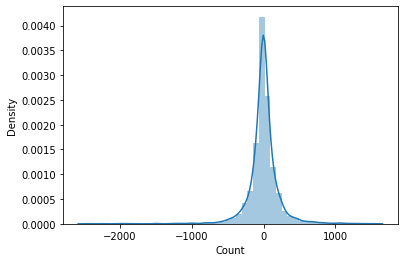

In [61]:
sns.distplot(y_test-predictions)

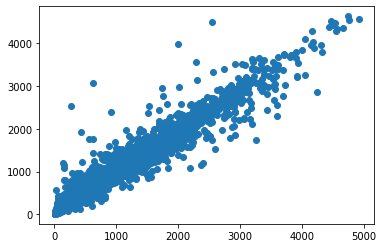

In [62]:
plt.scatter(y_test,predictions)

In [64]:
k = x_test.shape[1]
n = len(x_test)
n, k

(2991, 11)

# Step #5: Model Evaluation

In [65]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 221.201 
MSE = 48929.6849252143 
MAE = 124.95083675278593 
R2 = 0.9394839846464673 
Adjusted R2 = 0.9392605283964207
